## CITS2402 - Introduction to Data Science - Assignment.

### Comparing Demographic Trends in Australian and New Zealand Census Data

**Date:** August 2024.

## Declaration

This declaration should be completed and remain attached to the top of your submission.

*I/we am/are aware of the University’s [policy on academic conduct](https://www.uwa.edu.au/policy/-/media/Project/UWA/UWA/Policy-Library/Policy/Student-Administration/Academic-Integrity/Academic-Integrity-Policy.doc) and I declare that this assignment is entirely the work of the author(s) listed below and that suitable acknowledgement has been made for any sources of information used in preparing it. I have retained a copy for my own records.*

- Name 1:
- Student ID 1:
- Name 2: 
- Student ID 2:
- Name 3:
- Student ID 3:
- Date:


The suffix `-template` should be replaced with the corresponding student numbers. For instance, if you are doing your assignment with another person, you should rename your file as `CITS2402-Assignment-STDNO1-STDNO2.ipynb`, where 'STDNO1' and 'STDNO2' are the corresponding student numbers involved in the submission. 

<hr>


In [115]:
%%capture
# Install the necessary packages
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install openpyxl

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ds_path = "./datasets"

Loading the data for Australia, year 2016

In [47]:
# 2016 Census Australia
aus2016_a = pd.read_csv(f'{ds_path}/AUS/2016/2016Census_G51A_AUS.csv')
aus2016_b = pd.read_csv(f'{ds_path}/AUS/2016/2016Census_G51B_AUS.csv')
aus2016_c = pd.read_csv(f'{ds_path}/AUS/2016/2016Census_G51C_AUS.csv')
aus2016_d = pd.read_csv(f'{ds_path}/AUS/2016/2016Census_G51D_AUS.csv')

aus2016 = aus2016_a.merge(aus2016_b).merge(aus2016_c).merge(aus2016_d)

male_total = aus2016["M_Tot_Tot"][0]
male_health = aus2016["M_HlthCare_SocAs_Tot"][0]
male_not_health = male_total - male_health

female_total = aus2016["F_Tot_Tot"][0]
female_health = aus2016["F_HlthCare_SocAs_Tot"][0]
female_not_health = female_total - female_health

person_total = aus2016["P_Tot_Tot"][0]
person_health = aus2016["P_HlthCare_SocAs_Tot"][0]
person_not_health = person_total - person_health

# saving the data
aus2016 = {'male_total': male_total, 'female_total': female_total, 'person_total': person_total,
           'male_health': male_health, 'female_health': female_health, 'person_health': person_health}

Visualizing the data

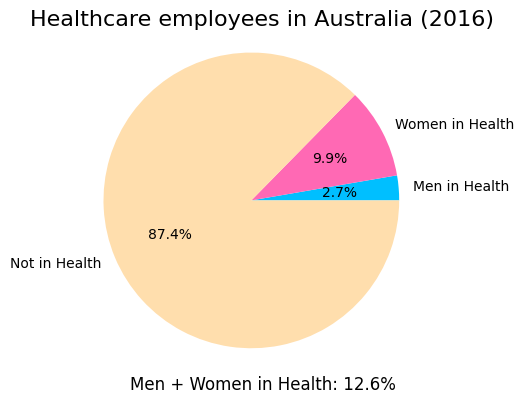

In [164]:
plt.pie(
    [male_health, female_health, person_not_health], 
    labels=["Men in Health", "Women in Health", "Not in Health"], 
    colors=["deepskyblue", "hotpink", "navajowhite"], autopct='%1.1f%%',
)
plt.title("Healthcare employees in Australia (2016)", x = 0.53, y = 1.1, fontsize = 16)
plt.figtext(
    0.53, 0.1, 
    f"Men + Women in Health: {(person_health / person_total * 100):.1f}%", 
    ha='center', fontsize=12
)
plt.show()

In [133]:
# 2021 Census Australia
aus2021 = pd.read_excel(f'{ds_path}/AUS/2021/2021_GCP_Sequential_Template_R2.xlsx', sheet_name="G54", header=None, skiprows=12, nrows=22)
aus2021 = aus2021.drop(20)
# aus2021.drop(0, axis=1).sum() 

TypeError: can only concatenate str (not "float") to str